<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

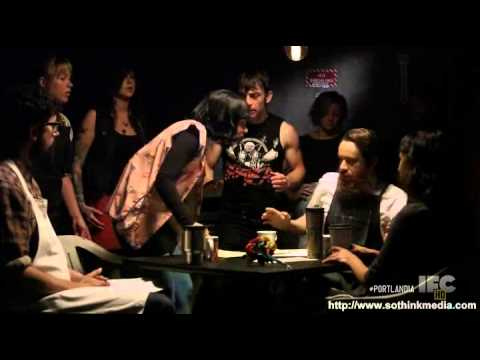

In [86]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\Andrew\\unit4\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [92]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [93]:
shops.shape

(7616, 3)

In [94]:
shops['star_rating'] = shops['star_rating'].apply(lambda x: " ".join(x.split()[0:1]))

In [95]:
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: " ".join(x.split()[1:]))

In [97]:
shops['star_rating'] = shops['star_rating'].astype(float)

In [98]:
shops['star_rating'] = shops['star_rating'].astype(int)

In [99]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4


In [100]:
shops['full_review_text'].value_counts()

Okay, so after visiting my friends in LA and trying a mint mojito iced coffee, I had to find one in Austin that's comparable. It was getting very difficult to find one to begin with, let alone a good one. I saw the mint coffee on the factory's website and had to try it. Unfortunately I was shell-shocked at the price tag ($7 if I remember correctly??) I figured it would be a large drink and particularly fabulous and hopefully large to make up for the over the top price (this is $3 more than philz) Was it particularly fabulous? No. It was good, it wasn't as good as philz. Was it bigger?? No. It was about 4 ounces of coffee, tops. Will I be back? Absolutely not, especially considering I can get a 20 oz mint mojito coffee from tea haus for $3 less that tastes just as good. This place is also self service (for ordering and pick up), why that would lead to inflated prices and not a price decrease is far beyond my understanding. I don't recommend it.                                           

In [101]:
import re

In [102]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [103]:
from collections import Counter
import pandas as pd
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

In [104]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [105]:
shops['tokens'].head()

0    [1, checkin, love, love, loved, the, atmospher...
1    [listed, in, date, night, austin, ambiance, in...
2    [1, checkin, listed, in, brunch, spots, i, lov...
3    [very, cool, decor, good, drinks, nice, seatin...
4    [1, checkin, they, are, located, within, the, ...
Name: tokens, dtype: object

In [106]:
word_counts = Counter()
shops['tokens'].apply(lambda x: word_counts.update(x))
word_counts.most_common(10)

[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546)]

In [107]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [108]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
65,the,6847,34809,1.0,0.044975,0.044975,0.899028
9,and,6864,26650,2.0,0.034433,0.079408,0.901261
61,a,6246,22755,3.0,0.029401,0.108809,0.820116
19,i,5528,20237,4.0,0.026147,0.134957,0.725840
33,to,5653,17164,5.0,0.022177,0.157133,0.742253


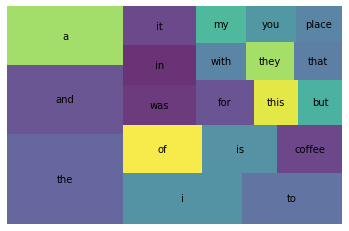

In [109]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [111]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in nlp.pipe(shops['full_review_text']):
    doc_tokens = []
    for token in doc:
        doc_tokens.append(token.text)
    
    tokens.append(doc_tokens)

In [ ]:
tokens[0]

In [113]:
shops['tokens'] = tokens

In [114]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5,"[1, check, -, in, Love, love, loved, the, atmo..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,"[Listed, in, Date, Night, :, Austin, ,, Ambian..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4,"[1, check, -, in, Listed, in, Brunch, Spots, I..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2,"[Very, cool, decor, !, Good, drinks, Nice, sea..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,"[1, check, -, in, They, are, located, within, ..."


In [115]:
wc = count(shops['tokens'])

In [116]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
37,.,7367,46950,1.0,0.051252,0.051252,0.967306
47,",",6067,29948,2.0,0.032692,0.083944,0.796612
55,the,6527,27967,3.0,0.030529,0.114473,0.857012
39,and,6816,26007,4.0,0.028390,0.142863,0.894958
41,I,5831,24313,5.0,0.026541,0.169404,0.765625


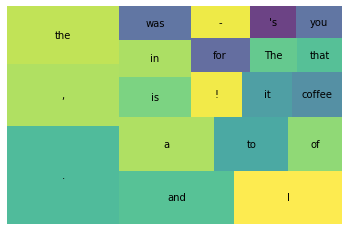

In [117]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [119]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in nlp.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [120]:
shops['tokens'].head()

0    [1, check, love, love, loved, atmosphere, corn...
1    [listed, date, night, austin, ambiance, austin...
2    [1, check, listed, brunch, spots, loved, eclec...
3    [cool, decor, good, drinks, nice, seating, ove...
4    [1, check, located, northcross, mall, shopping...
Name: tokens, dtype: object

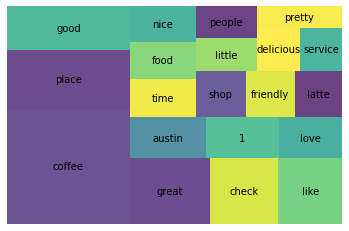

In [121]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [122]:
STOP_WORDS = nlp.Defaults.stop_words.union(['place'], '1', 'check', 'people', 'time', 'austin')

In [124]:
tokens = []

for doc in nlp.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if (token.is_punct == False) & (token.text.lower() not in STOP_WORDS):
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
shops['tokens'] = tokens

In [125]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
22,coffee,4911,10539,1.0,0.029780,0.029780,0.644827
166,good,2792,3986,2.0,0.011263,0.041043,0.366597
113,great,2843,3933,3.0,0.011113,0.052157,0.373293
4,check,3129,3357,4.0,0.009486,0.061642,0.410846
159,like,2142,3125,5.0,0.008830,0.070473,0.281250


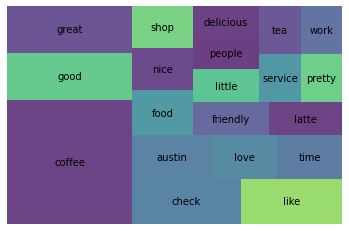

In [126]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [127]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [128]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [130]:
shops['lemmas'].head()

0    [1, check, Love, love, love, atmosphere, corne...
1    [list, Date, Night, Austin, Ambiance, Austin, ...
2    [1, check, list, Brunch, Spots, love, eclectic...
3    [cool, decor, good, drink, nice, seating, over...
4    [1, check, locate, Northcross, mall, shopping,...
Name: lemmas, dtype: object

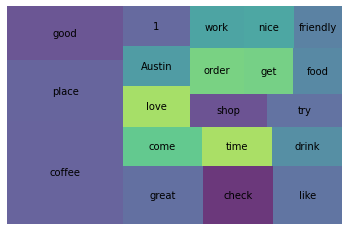

In [132]:
wc = count(shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [133]:
shops['star_rating'].value_counts()

5    3780
4    2360
3     738
2     460
1     278
Name: star_rating, dtype: int64

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [139]:
mask = shops['star_rating'] >=4

In [145]:
good_df = shops[mask]

In [146]:
good_df

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5,"[check, love, love, loved, atmosphere, corner,...","[1, check, Love, love, love, atmosphere, corne..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,"[listed, date, night, austin, ambiance, austin...","[list, Date, Night, Austin, Ambiance, Austin, ..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4,"[check, listed, brunch, spots, loved, eclectic...","[1, check, list, Brunch, Spots, love, eclectic..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,"[check, located, northcross, mall, shopping, c...","[1, check, locate, Northcross, mall, shopping,..."
5,The Factory - Cafe With a Soul,1 check-in Very cute cafe! I think from the mo...,4,"[check, cute, cafe, think, moment, stepped, fi...","[1, check, cute, cafe, think, moment, step, fi..."
...,...,...,...,...,...
7610,The Steeping Room,Great food! I haven't had a meal I did not enj...,5,"[great, food, meal, enjoy, clean, great, peopl...","[great, food, meal, enjoy, clean, great, peopl..."
7611,The Steeping Room,I actually step into this restaurant by chance...,4,"[actually, step, restaurant, chance, favorites...","[actually, step, restaurant, chance, favorite,..."
7612,The Steeping Room,"Ok, The Steeping Room IS awesome. How do they ...",5,"[ok, steeping, room, awesome, great, menu, ite...","[ok, Steeping, Room, awesome, great, menu, ite..."
7613,The Steeping Room,"Loved coming here for tea, and the atmosphere ...",4,"[loved, coming, tea, atmosphere, pretty, fresh...","[love, come, tea, atmosphere, pretty, fresh, o..."


In [144]:
mask_1 = shops['star_rating'] <= 3

In [147]:
bad_df = shops[mask_1]

In [148]:
bad_df.head()

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2,"[cool, decor, good, drinks, nice, seating, ove...","[cool, decor, good, drink, nice, seating, over..."
8,The Factory - Cafe With a Soul,"1 check-in Ok, let's try this approach... Pros...",3,"[check, ok, let, try, approach, pros, music, s...","[1, check, ok, let, try, approach, pro, music,..."
11,The Factory - Cafe With a Soul,"The store has A+ decoration, but honestly, the...",3,"[store, a+, decoration, honestly, coffee, good...","[store, a+, decoration, honestly, coffee, good..."
12,The Factory - Cafe With a Soul,1 check-in Listed in 2016 - The Third Time is ...,3,"[check, listed, 2016, time, charm, factory, a+...","[1, check, list, 2016, time, Charm, Factory, a..."
25,The Factory - Cafe With a Soul,"Okay, so after visiting my friends in LA and t...",1,"[okay, visiting, friends, la, trying, mint, mo...","[okay, visit, friend, LA, try, mint, mojito, i..."


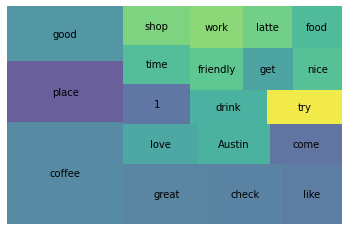

In [153]:
wc_good = count(good_df['lemmas'])
wc_good_top20 = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_good_top20['pct_total'], label=wc_good_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

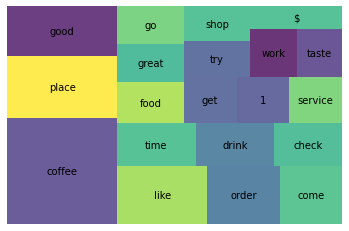

In [154]:
wc_bad = count(bad_df['lemmas'])
wc_bad_top20 = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_bad_top20['pct_total'], label=wc_bad_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

